<a href="https://colab.research.google.com/github/Aduomas/PP6/blob/main/Practical_Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

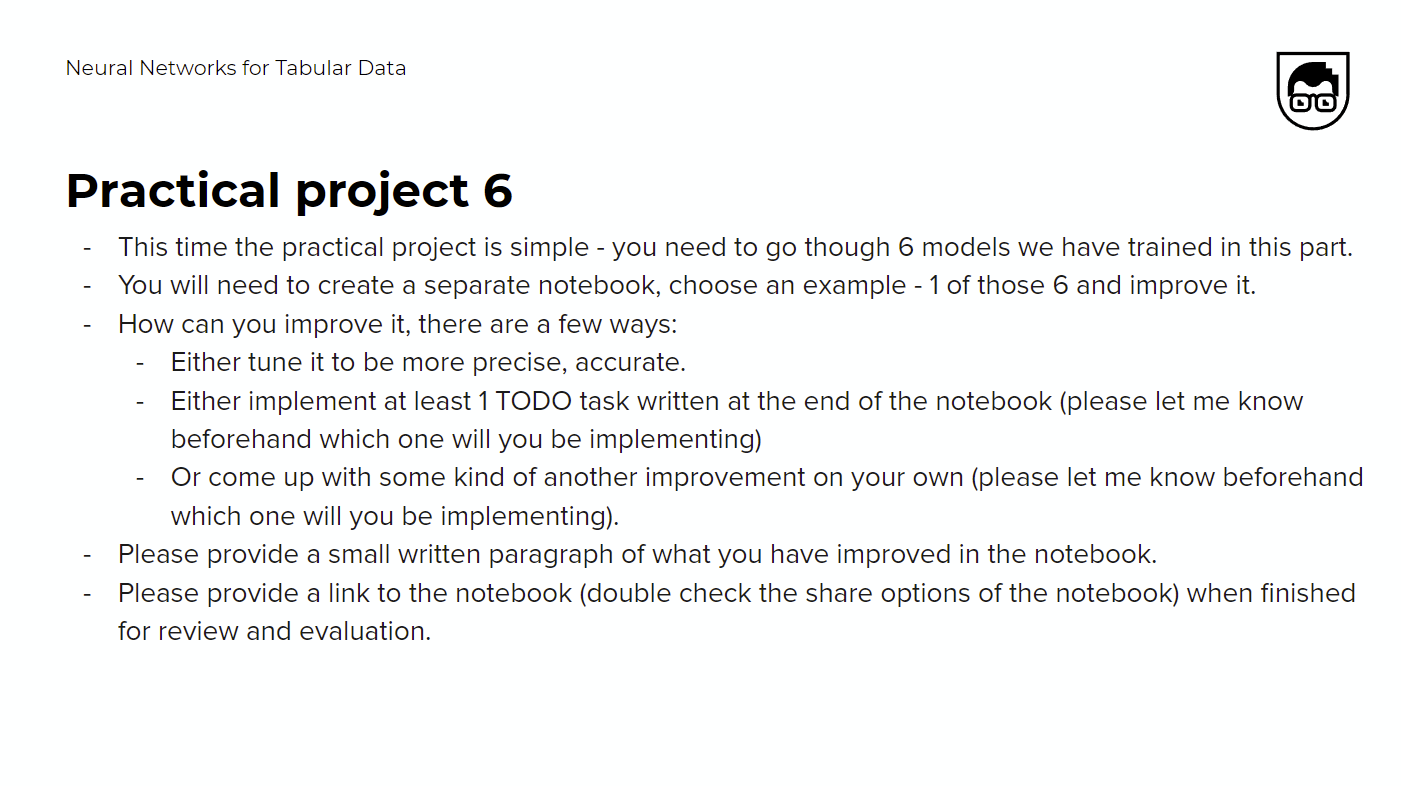

# R2 Score to beat --- 0.7880933354982693

## Updated model

### Preprocessing with sklearn StandardScaler

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.datasets import boston_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() ## 0.8 0.2

scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.transform(test_data)

inputs = np.concatenate((train_data, test_data), axis=0)
targets = np.concatenate((train_targets, test_targets), axis=0)
inputs = scaler.fit_transform(inputs)

### K-fold cross validation with sklearn

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(Dropout(0.1))
  model.add(layers.Dense(32, activation='relu'))
  model.add(Dropout(0.1))

  model.add(layers.Dense(1))
  model.compile(optimizer=Adam(learning_rate=0.002), loss='mse', metrics=[coeff_determination])
  return model

# Regression: K-fold cross validation with scikit instead of manual
kfold = KFold(n_splits=4, shuffle=True)
num_epochs = 75
r2_scores = []
history = []

fold_no = 1
for train, test in kfold.split(inputs,targets):
  model = build_model()
  history.append(model.fit(inputs[train], targets[train], batch_size=3, epochs=num_epochs, verbose=0, validation_data=(inputs[test], targets[test])))
  scores = model.evaluate(inputs[test], targets[test], verbose=0)

  # print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  print('Epoch: ', fold_no)
  print('   RMSE=%f' % (np.sqrt(mean_squared_error(targets[test], model.predict(x=inputs[test])))))
  print('   MSE=%f' % (mean_squared_error(targets[test], model.predict(x=inputs[test]))))
  print('   MAE=%f' % (mean_absolute_error(targets[test], model.predict(x=inputs[test]))))
  print('   R^2=%f' % (r2_score(targets[test], model.predict(x=inputs[test]))))
  fold_no += 1
  r2_scores.append(r2_score(targets[test], model.predict(x=inputs[test])))

print(np.mean(r2_scores))

Epoch:  1
   RMSE=4.305543
   MSE=18.537703
   MAE=2.545790
   R^2=0.800560
Epoch:  2
   RMSE=3.155783
   MSE=9.958964
   MAE=2.416657
   R^2=0.899729
Epoch:  3
   RMSE=3.965880
   MSE=15.728207
   MAE=2.640306
   R^2=0.838264
Epoch:  4
   RMSE=2.905550
   MSE=8.442220
   MAE=2.376679
   R^2=0.822682
0.8403088704050322


## new result - 0.8403088704050322

### Error vs epoch

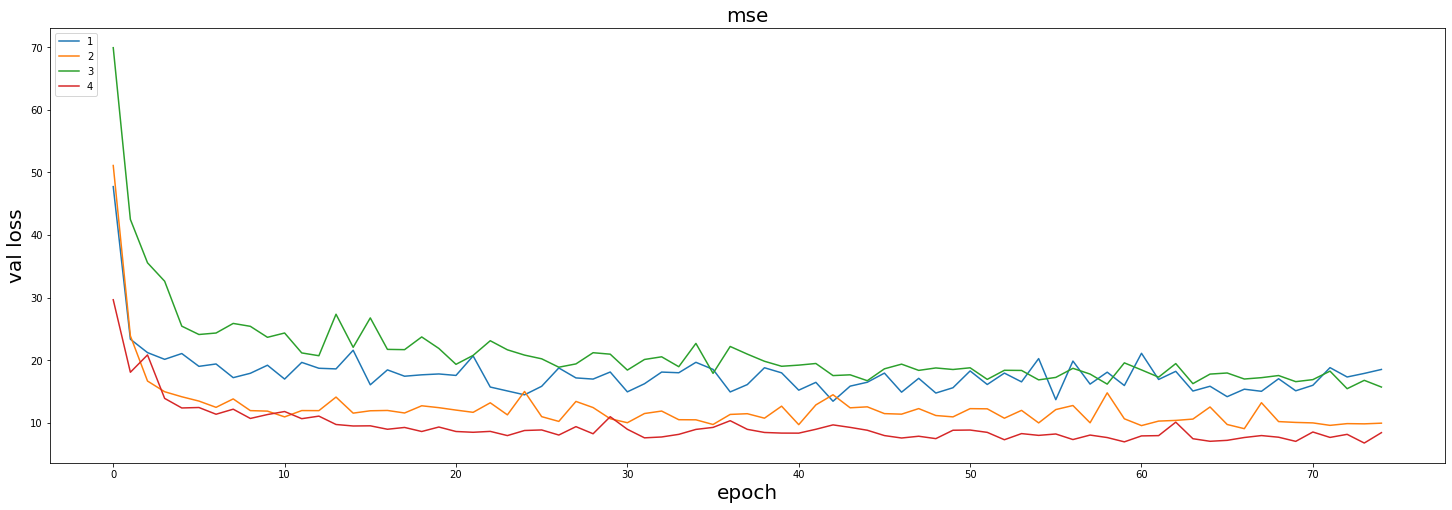

In [ ]:
# Regression: Error vs. epoch graph

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,8)
plt.title('mse', fontsize=20)
plt.ylabel('val loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
for i in range(len(history)):
  plt.plot(history[i].history['val_loss'])

plt.legend(range(1, 5), loc='upper left')
plt.show()

## Conclusion

For improving I chose to use lower dropout (0.4 -> 0.2), higher learning rate (x2 from previous), and slightly more epochs. I've implemented KFold from sklearn and error vs epoch graph. Implementing one-cycle-policy for keras model was unsuccessful due to very few projects available(although, i've tried).